> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Investigate Movie Data) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

>This dataset contains data related to thousands of movies. This includes the budget for the movies, the revenue earned, the genres, actors, directors, and ratings. In this report I will investigate different aspects of this movie data such as the relationship between budget and revenue, the most popular genres, and the relationship between different genres and revenue. These data points could all give valuable insight into which movies are the most popular and which movies will earn the most revenue.


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib as mp
import statsmodels.api as sm
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Drop unwanted columns
df = df.drop(['homepage','tagline','keywords','overview','production_companies'],axis=1)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.shape

(10866, 16)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Some of the data entries contain null values for budget and revenue. In this case I considered populating these null values with the average budget and revenue values from the entire population. However, after looking into some of these values these movies may not be best represented by the mean values of all movies. They could be missing their values because the movies were very low budget, so the mean values of all movies may be too high. As a result I will drop these null values from investigation.)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#only view rows where there are no 0 values
#found from this stackoverflow https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

df = df[(df != 0).all(1)]

In [8]:
df.shape

(3855, 16)

In [9]:
#The below cell breaks out the genres from the weird format separated by |

In [10]:
split_genres1 = df['genres'].str.split('|', expand = False)

In [11]:
split_genres1.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [12]:
###
###The below cell adds up the number of movies for each genre and then turns them into a list that can be grabbed by a bar graph
###

In [13]:
def genre_counter():
    action_count=0
    adventure_count=0
    animation_count=0
    comedy_count=0 
    crime_count=0 
    documentary_count=0
    drama_count=0 
    family_count=0
    fantasy_count=0 
    history_count=0 
    horror_count=0 
    music_count=0 
    mystery_count=0 
    romance_count=0 
    sci_count=0 
    tv_count=0 
    thriller_count=0
    war_count=0
    western_count=0
   
    
    for i in split_genres1:    
        for j in i:
            if j=='Action':
                action_count+=1
            elif j=='Adventure':
                adventure_count+=1
            elif j=='Animation':
                animation_count+=1
            elif j=='Comedy':
                comedy_count+=1
            elif j=='Crime':
                crime_count+=1
            elif j=='Documentary':
                documentary_count+=1
            elif j=='Drama':
                drama_count+=1
            elif j=='Family':
                family_count+=1
            elif j=='Fantasy':
                fantasy_count+=1
            elif j=='History':
                history_count+=1
            elif j=='Horror':
                horror_count+=1
            elif j=='Music':
                music_count+=1
            elif j=='Mystery':
                mystery_count+=1
            elif j=='Romance':
                romance_count+=1
            elif j=='Science Fiction':
                sci_count+=1
            elif j=='TV Movie':
                tv_count+=1
            elif j=='Thriller':
                thriller_count+=1
            elif j=='War':
                war_count+=1
            elif j=='Western':
                western_count+=1
            
        
    
    
    return [action_count, adventure_count, animation_count, comedy_count, crime_count, documentary_count, drama_count, family_count,fantasy_count, history_count, horror_count, music_count, mystery_count, romance_count, sci_count, tv_count, thriller_count,war_count, western_count]

    





# count=0
# for i,j in enumerate(split_genres1):  
#     print (i,j)
#     if 'Action' in split_genres1[i]:
#         count+=1
# return count




    

In [14]:
###The below graph creates a bar graph of the number of movies per genre. This data could be important because it shows
#which genres of movies are most common

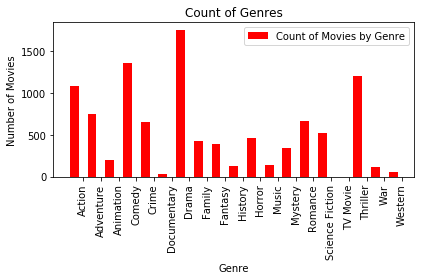

In [15]:
import matplotlib.pyplot as plt   
    
n_cat = 19
genres = genre_counter()


fig, ax = plt.subplots()
index = np.arange(n_cat)
bar_width = 0.5
opacity = 1

genre_bar = plt.bar(index, genres, bar_width,alpha=opacity, color = 'r',label = 'Count of Movies by Genre')



plt.xlabel ('Genre')
plt.ylabel ('Number of Movies')
plt.title ('Count of Genres')
plt.xticks(index + bar_width, ('Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'),rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
    

In [16]:
#format for breaking out columns found here https://pandas.pydata.org/pandas-docs/stable/text.html
#this will be used to create dummy variables for genres
split_genres = df['genres'].str.split('|', expand = True)


In [17]:
split_genres.count()

0    3855
1    3206
2    2113
3     874
4     260
dtype: int64

In [48]:
split_genres.head()

,0,1,2,3,4,Group
0,Action,Adventure,Science Fiction,Thriller,None,Action
1,Action,Adventure,Science Fiction,Thriller,None,Action
2,Adventure,Science Fiction,Thriller,None,None,Adventure
3,Action,Adventure,Science Fiction,Fantasy,None,Action
4,Action,Crime,Thriller,None,None,Action


In [19]:
split_genres.count()

0    3855
1    3206
2    2113
3     874
4     260
dtype: int64

In [20]:
#add column that equals 0 from split_genres to use for grouping
split_genres['Group']= split_genres[0]

In [21]:
#group by new 'Group' column to get count of all genres
genre_count = split_genres.groupby('Group').count()


In [22]:
split_genres.describe()


,0,1,2,3,4,Group
count,3855,3206,2113,874,260,3855
unique,19,19,19,18,17,19
top,Drama,Drama,Thriller,Thriller,Thriller,Drama
freq,890,584,392,215,54,890


In [47]:

df = df.merge(split_genres, left_index=True,right_index=True )
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre_one,Genre_two,Genre_three,Genre_four,Genre_five,Group_x,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,intercept,0,1,2,3,4,Group_y
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Action,Adventure,Science Fiction,Thriller,None,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Action,Adventure,Science Fiction,Thriller,None,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,Adventure,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Adventure,Science Fiction,Thriller,None,None,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Action,Adventure,Science Fiction,Fantasy,None,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Action,Crime,Thriller,None,None,Action


In [24]:
df.shape

(3855, 22)

In [25]:
#drop rows where movie title is duplicated
df = df.drop_duplicates(subset='original_title',keep='first')


In [26]:
#rename genre columns to index names
df=df.rename(columns={0:'Genre_one',1:'Genre_two',2:'Genre_three',3:'Genre_four',4:'Genre_five'})

In [27]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,Genre_one,Genre_two,Genre_three,Genre_four,Genre_five,Group
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,Action
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,...,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,None,Western
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,...,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,None,Science Fiction
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,...,7.6,2015,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction,None,None,Drama
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,...,6.5,2015,6.807997e+07,1.064192e+09,Family,Animation,Adventure,Comedy,None,Family
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,...,8.0,2015,1.609999e+08,7.854116e+08,Comedy,Animation,Family,None,None,Comedy


In [28]:
#turn 4 columns of genres into dummy variables for data analysis
df[['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']] = pd.get_dummies(df['Genre_one'])

In [29]:
pd.set_option('display.max_columns', None)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre_one,Genre_two,Genre_three,Genre_four,Genre_five,Group,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,Adventure,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,None,Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,None,Science Fiction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction,None,None,Drama,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Family,Animation,Adventure,Comedy,None,Family,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy,Animation,Family,None,None,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df.shape

(3808, 41)

In [31]:
#below a multi linear regression is performed between revenue and all genres to determine if revenue is correlated
#positively or negatively with any certain genres

In [32]:
df['intercept'] = 1

lm = sm.OLS(df['revenue'],df[['intercept','Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Fantasy','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     25.99
Date:                Sun, 01 Apr 2018   Prob (F-statistic):           1.49e-82
Time:                        18:37:38   Log-Likelihood:                -77508.
No. Observations:                3808   AIC:                         1.551e+05
Df Residuals:                    3789   BIC:                         1.552e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept        7.996e+07   4.19e+07      1.908      0.057   -2.22e+06    1.62e+08
Action           5.629e+07   4.24e+07      1.327      0.184   -2.69e+07    1.39e+08
Adventure        1.527e+08    4.3e+07      3.551      0.000    6.84e+07    2.37e+08
Animation        1.996e+08   4.51e+07      4.422      0.000    1.11e+08    2.88e+08
Comedy          -9.972e+05   4.23e+07     -0.024      0.981    -8.4e+07     8.2e+07
Crime           -7.773e+06   4.39e+07     -0.177      0.859   -9.38e+07    7.82e+07
Documentary      -5.85e+07   5.13e+07     -1.140      0.255   -1.59e+08    4.22e+07
Drama           -1.517e+07   4.23e+07     -0.359      0.720   -9.81e+07    6.78e+07
Family           1.376e+08   4.96e+07      2.774      0.006    4.03e+07    2.35e+08
Fantasy          3.982e+07   2.24e+07      1.775      0.076   -4.16e+06    8.38e+07
Fantasy          3.982e+07   2.24e+07      1.775      0.076   -4.16e+06    8.38e+07
History          3.365e+07   5.84e+07      0.576      0.564   -8.08e+07    1.48e+08
Horror          -2.421e+07   4.32e+07     -0.561      0.575   -1.09e+08    6.05e+07
Music            -2.54e+06   5.22e+07     -0.049      0.961   -1.05e+08    9.98e+07
Mystery         -7.843e+06   5.04e+07     -0.156      0.876   -1.07e+08    9.09e+07
Romance          2.182e+07   4.67e+07      0.467      0.640   -6.98e+07    1.13e+08
Science Fiction  9.147e+07   4.53e+07      2.020      0.043    2.71e+06     1.8e+08
TV Movie        -3.796e+07   1.73e+08     -0.220      0.826   -3.77e+08    3.01e+08
Thriller        -9.646e+05    4.4e+07     -0.022      0.983   -8.72e+07    8.53e+07
War              5.352e+07   5.62e+07      0.952      0.341   -5.67e+07    1.64e+08
==============================================================================
Omnibus:                     3458.826   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197672.207
Skew:                           4.152   Prob(JB):                         0.00
Kurtosis:                      37.306   Cond. No.                     4.26e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
#above you can see that revenue has significant positive correlations with certain genres, but not with others. This could mean
#certain genres in general will lead to higher revenue. Perhaps they draw in more viewers.

# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Budget affect revenue?) An important question... does a higher budget result in higher revenue? This could help moviemakers decide how much of a budget they need.

In [34]:
#below a linear regression between budget and revenue is performed. the results of this data could give valuable insight
#into whether movies with higher budgets generally earn more revenue

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# does budget have an affect on revenue?
df['intercept'] = 1

lm=sm.OLS(df['revenue'], df[['intercept','budget']])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     3420.
Date:                Sun, 01 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:37:41   Log-Likelihood:                -76509.
No. Observations:                3808   AIC:                         1.530e+05
Df Residuals:                    3806   BIC:                         1.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.125e+05   2.78e+06      0.112      0.911   -5.14e+06    5.77e+06
budget         2.8830      0.049     58.485      0.000       2.786       2.980
==============================================================================
Omnibus:                     3172.268   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232635.379
Skew:                           3.498   Prob(JB):                         0.00
Kurtosis:                      40.646   Cond. No.                     7.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#above you can see by the R2 value of .474 that revenue is positively correlated with budget, and the small p-value
#indicates that the relationship is statistically significant. the R2 value isn't extremely high though, so the two variables
# are only slightly positively correlated

In [37]:
#the below scatterplot is used to visualize the relationship between budget and revenue

(0.68798761292029076, 0.0)

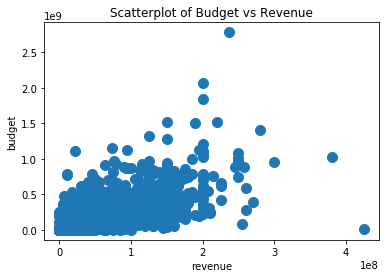

In [38]:
#visual representation of the positive relationship between budget and revenue. correlation returns R value, linear
#linear regression above shows r^2
import scipy
mp.pyplot.scatter(df.budget,df.revenue,100)
plt.title('Scatterplot of Budget vs Revenue')
plt.xlabel('revenue')
plt.ylabel('budget')
scipy.stats.pearsonr(df.budget,df.revenue)


In [39]:
#scatterplot shown above illustrates the positive correlation between budget and revenue



### Research Question 2  (Does popularity affect revenue?) Do movies that appeal to the masses earn more revenue? Do movies that score higher in popularity earn more revenue?

In [40]:
#the below regression compares runtime and revenue. do longer movies earn more money?

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['intercept'] = 1

lm=sm.OLS(df['revenue'], df[['intercept','runtime']])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 01 Apr 2018   Prob (F-statistic):           8.09e-56
Time:                        18:37:42   Log-Likelihood:                -77605.
No. Observations:                3808   AIC:                         1.552e+05
Df Residuals:                    3806   BIC:                         1.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.354e+08   1.55e+07     -8.753      0.000   -1.66e+08   -1.05e+08
runtime     2.229e+06   1.39e+05     16.000      0.000    1.96e+06     2.5e+06
==============================================================================
Omnibus:                     3306.429   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140490.169
Skew:                           3.972   Prob(JB):                         0.00
Kurtosis:                      31.676   Cond. No.                         618.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#above you can see that revenue isn't positively or negatively correlated with runtime

In [43]:
#below you can see the average vote rating of movies grouped to the nearest int and counted. this data could be useful in showing
#average movie ratings, in determining how many movies are rated very low '2', or very highly '8'. do the reviewers seem to rate
#a greater number of movies high or low?
#the most common rating is 6 

In [44]:
df['vote_average']=df['vote_average'].astype(np.int64)

,id
vote_average,
2,1
3,27
4,226
5,1192
6,1736
7,605
8,21


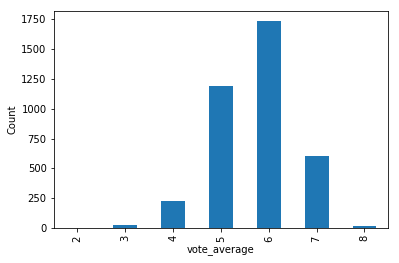

In [45]:
df.groupby(['vote_average'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['vote_average'])[['id']].count()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

My findings show that in the database the genre that was most prevalent in the movie data was Drama, and comedies are the second most prevalent. However, based on a multilinear regression it doesn't seem that either of these genres had a stasticially significant relationship with revenue. Most of my research was regarding how different aspects would impact the revenue a film earned. In one regression it showed that budget and revenue are positively correlated. Could that be because the movies were higher quality? Could films with bigger budgets market more? Those could be explored later. I also explored the rating data for all of the movies. The distribution of the ratings seems to be close to normal, with the reviewers not favoring high or low ratings. The final regression looked into the relationship between runtime in revenue. No statistically significant relationship was found between these variables. Perhaps viewers are agnostic to the length of movies.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0